In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram , linkage, cut_tree
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/DATA_2.03_Telco.csv')
df.head()

,Calls,Intern,Text,Data,Age
0,1.12,0.19,23.92,0.18,60
1,1.08,0.22,17.76,0.23,54
2,3.54,0.26,289.79,1.99,34
3,1.09,0.21,19.15,0.21,61
4,1.04,0.24,20.33,0.20,56


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Calls   1000 non-null   float64
 1   Intern  1000 non-null   float64
 2   Text    1000 non-null   float64
 3   Data    1000 non-null   float64
 4   Age     1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


,Calls,Intern,Text,Data,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.629930,0.404840,225.021570,1.964750,37.776000
std,1.516563,0.377571,213.821509,1.374458,16.195311
min,0.850000,0.090000,17.010000,0.170000,12.000000
25%,1.490000,0.110000,20.770000,0.520000,24.000000
50%,2.040000,0.220000,190.525000,1.980000,35.000000
75%,3.492500,0.790000,449.437500,2.902500,51.000000
max,6.000000,1.200000,598.940000,4.790000,72.000000


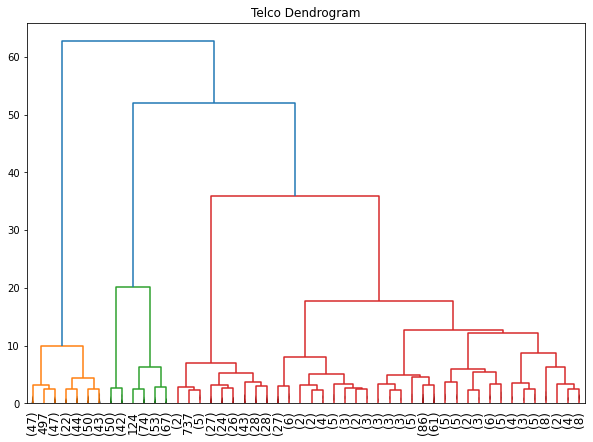

In [4]:
testdata = df.copy()

testdata = scale(testdata)
d = pdist(testdata)
# linkage function performs hiearchical clustering, we pass it the distances, 
# and we set the method argument to weighted
hcward = linkage(d, method='ward')

if True:
    plt.figure(figsize=(10, 7))
    plt.title("Telco Dendrogram")

    # Plot dendrogram
    dend = dendrogram(hcward, 
                      p = 50,
                      truncate_mode='lastp',
                      show_contracted=True,
                      leaf_rotation=90,
                      leaf_font_size=12)

In [5]:
# Finally: we assign our points to our k=5 clusters
df['groups'] = cut_tree(hcward, n_clusters=5)

# We compute some statistics of each group
aggdata = df.groupby('groups').mean()

proptemp = df[['Calls', 'groups']].groupby('groups').count()
aggdata['proportion'] = proptemp.Calls / sum(proptemp.Calls)
aggdata.sort_values(by='proportion', ascending=False, inplace=True)

In [6]:
aggdata.head()

,Calls,Intern,Text,Data,Age,proportion
groups,,,,,,
1,3.096327,0.517309,307.609855,2.027891,33.581818,0.275
4,1.706024,0.103937,509.418858,3.731220,18.952756,0.254
0,1.032308,0.204513,21.886974,0.208974,60.825641,0.195
2,5.068098,1.014891,26.084565,2.014783,46.690217,0.184
3,2.296522,0.103913,21.401630,0.520435,35.597826,0.092


Now we can do cluster profiling and come up with a meaningful label for each group:
1. A **heavy** user segment making a lot of calls, using a lot of data and text messages.
2. A **young-adult** segment using a lot of data and texts, but fewer calls.
3. A **silver** segment with a low usage overall, but more seasoned.
4. A **pro** segment with a lot of national and international calls, and a lot of data.
5. A **light** user segment.

In [7]:
aggdata['label'] = ['Heavy User', 'YA', 'Silver', 'Pro', 'Light User']
aggdata

,Calls,Intern,Text,Data,Age,proportion,label
groups,,,,,,,
1,3.096327,0.517309,307.609855,2.027891,33.581818,0.275,Heavy User
4,1.706024,0.103937,509.418858,3.731220,18.952756,0.254,YA
0,1.032308,0.204513,21.886974,0.208974,60.825641,0.195,Silver
2,5.068098,1.014891,26.084565,2.014783,46.690217,0.184,Pro
3,2.296522,0.103913,21.401630,0.520435,35.597826,0.092,Light User


An efficient marketing strategy will define for each segment, the bundle to offer, at the right price, on the right place, with the right message. This message will be a function of what the customer needs but also their social demographics.